### Análisis no supervisado

Para el análsis no supervisado vamos a usar K-means

### Cargar librerias

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Cargar datos y crear DF

In [75]:
df = pd.DataFrame(pd.read_csv('df.csv'))
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spend
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,...,0,0,0,0,3,11,1,67,0,1617
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,...,0,0,0,0,3,11,0,70,2,27
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,...,0,0,0,0,3,11,0,59,0,776
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,...,0,0,0,0,3,11,0,40,1,53
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,...,0,0,0,0,3,11,0,43,1,422


### Preprocesamiento 

In [76]:
# Rellenamos los valores nulos en 'Income' con la mediana
df['Income'].fillna(df['Income'].median(), inplace=True)

# Seleccionamos las columnas relevantes para clustering
features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
            'NumWebVisitsMonth', 'Total_Spend', 'Age', 'Total_Children']

# Estandarizamos los datos
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

C:\Users\HOME\AppData\Local\Temp\ipykernel_13572\2423882084.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


### Determinación del número óptimo de clusters

Para esto vamos a usar el método del codo

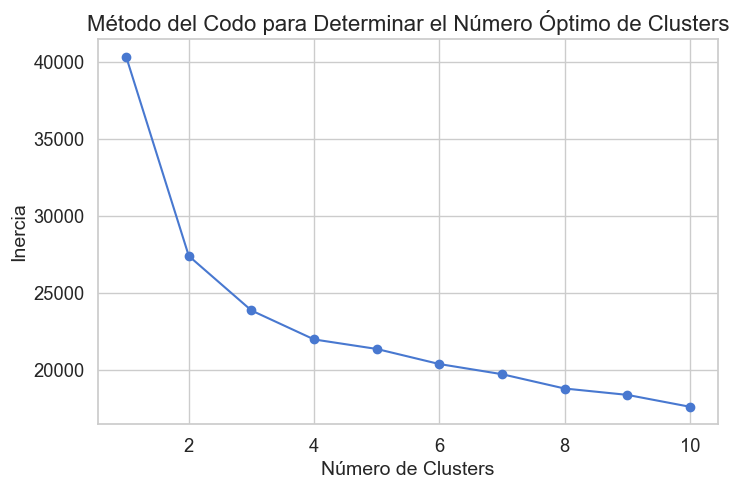

In [77]:
# Método del codo
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters', fontsize=16)
plt.xlabel('Número de Clusters',fontsize=14)
plt.ylabel('Inercia',fontsize=14)
plt.show()

**Análisis:**

Analizando la gráfica podemos seleccionar el número óptimo de clusters viendo en la gráfica donde los cambios en lapendiente ya no son tan significativos,en este caso el valor de la pendiente apartir del valor 8 ya no es tan grande por lo cual seleccionaremos el número 8 como el número óptimo de clusters

### Agrupamiento

In [78]:
# Aplicamos K-means con k=8
kmeans = KMeans(n_clusters=8, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


### Análisis de clusters

### HeatMap de clusters

Con este heatmap quiero resaltar las caracteristicas promedio de cada cluster y poder tener una visión global de los grupos conformados y sus caracteristicas.

In [84]:
# Agrupamos por cluster y calculamos la media de cada característica
cluster_summary = df.groupby('Cluster')[features].mean()

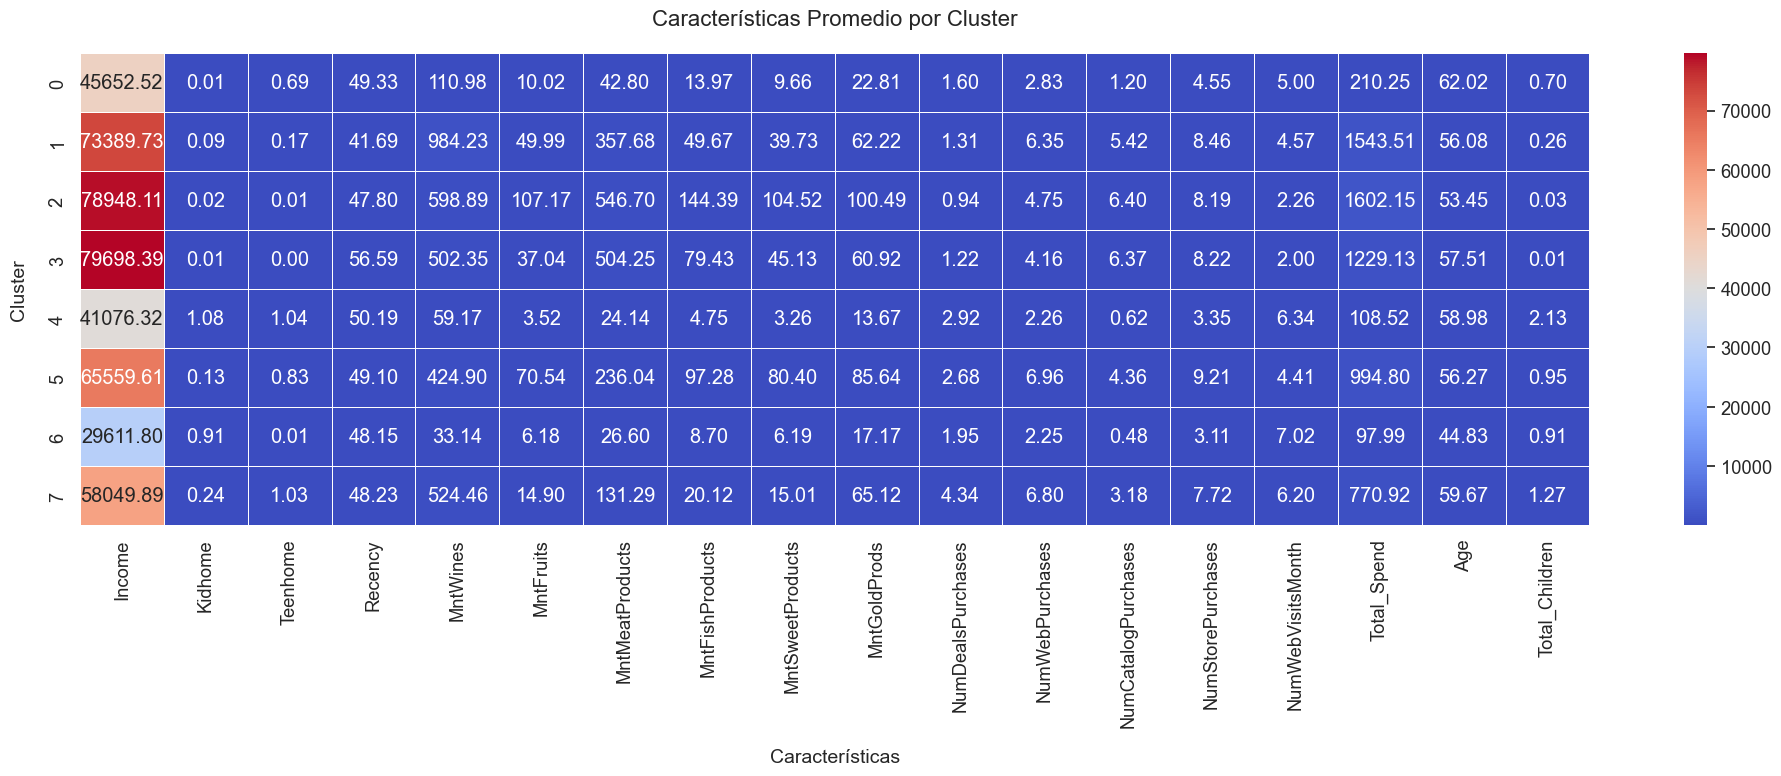

In [86]:
# Ahora creamos el heatmap
plt.figure(figsize=(20, 8))

sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Características Promedio por Cluster', fontsize=16, pad=20)
plt.xlabel('Características', fontsize=14, labelpad=15)
plt.ylabel('Cluster', fontsize=14, labelpad=15)

plt.tight_layout()
plt.show();

### Clientes por cada cluster

Analicemos los clientes por cada cluster para ver como se distribuyen

C:\Users\HOME\AppData\Local\Temp\ipykernel_13572\4100093410.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')


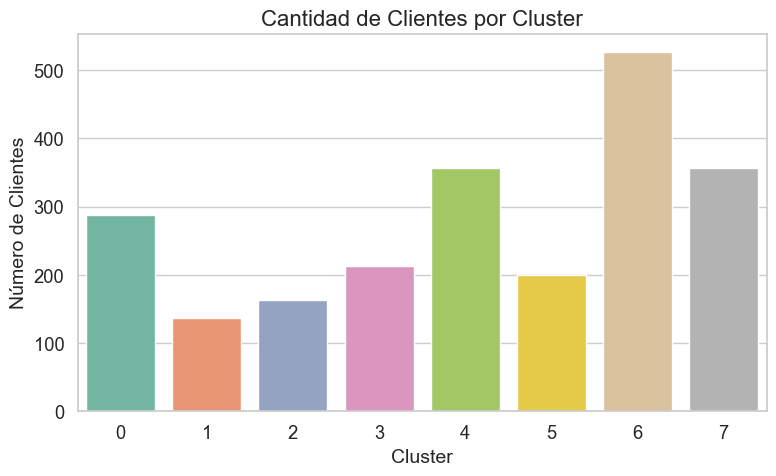

In [88]:
# Contamos el número de clientes por cluster
cluster_counts = df['Cluster'].value_counts()


# Creamos un gráfico de barras
plt.figure(figsize=(8, 5)) 
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')

plt.title('Cantidad de Clientes por Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)

plt.tight_layout()
plt.show();

### Análisis final de clusters

Analisemos cada cluster describiendo un comportamiento de compras de acuerdo al promedio de sus caracteristicas:


**Cluster 0**

- Ingresos bajos (45,652) comparado con otros grupos.
- Baja cantidad de hijos adolescentes (0.7) y casi ningún niño.
- Gasto bajo en todos los productos, particularmente en vinos y productos de carne.
- Tienden a comprar en tienda física y en línea pero muy poco en cátalogo
- Edad avanzada (62 años).

**Cluster 1**

- Ingresos altos (73,389) y recencia moderada (41 días).
- Gran gasto en vinos, productos cárnicos y otros productos de lujo (62 en productos de oro, 984 en vinos).
- Pocas responsabilidades familiares (0.09 niños).
- Tienen actividad de compra similar en todos los canales
- Edad promedio (56 años).

**Cluster 2**

- Ingresos altos (78,948) con muy baja cantidad de hijos.
- Gasto elevado en casi todas las categorías, con especial enfoque en carnes y productos de lujo.
- Tambien compran en todos los canales pero compran más en catálogo que en la web
- Edad promedio (53 años).

**Cluster 3**

- Ingresos más altos (79,698) con mínimos hijos.
- Gasto similar al Cluster 2, pero ligeramente menor en productos de carne.
- Sus compras en los canales es muy similar al cluster 2
- Edad avanzada (57 años).

**Cluster 4**

- Ingresos bajos (41,076) y alto número de hijos (1.08 niños, 1.04 adolescentes).
- Gasto extremadamente bajo en todos los productos.
- Sus compras en los canales son muy bajas y se explica por lo bajo de sus ingresos
- Edad media (59 años).

**Cluster 5**

- Ingresos moderados (65,559) con algún nivel de responsabilidad familiar (0.12 niños, 0.83 adolescentes).
- Gasto elevado en productos de lujo (85 en productos de oro) y un gasto moderado en vinos (424).
- Compran principalmente en tienda y web aunque también lo hacen en menor medida en catálogo.
- Edad media (56 años).

**Cluster 6**

- Ingresos muy bajos (29,611) y alta cantidad de niños (0.91).
- Gasto extremadamente bajo en todas las categorías.
- Compra en los canales muy baja debido a quetambién tienen los ingresos más bajos 
- Edad más joven (44 años).

**Cluster 7**

- Ingresos medios (58,049) y cantidad moderada de hijos (1 niño, 1 adolescente).
- Gasto elevado en vinos (524) y moderado en productos de lujo.
- Tienen una tendenciafuerte de comprar en tienda y web
- Edad avanzada (59 años).

**Resumen General**

- **Clusters 1, 2 y 3:** Se identifican como los clusters con ingresos altos y con un alto gasto en productos de lujo.
- **Clusters 0, 4 y 6:** Representan a personas de ingresos bajos con un gasto muy limitado en productos.
- **Clusters 5 y 7:** Son de ingresos medios y tienen un interés en productos de lujo, especialmente en vinos.